In [4]:
from typing import Union
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from pathlib import Path

- 모델 학습에 필요한 `random_seed` 를 설정하고, `DATA_PATH` 를 설정합니다.
- 해당 `DATA_PATH` 에는 `train.csv`, `test.csv` 파일이 있다고 가정합니다.

In [5]:
RANDOM_SEED = 42
DATA_PATH = Path("../../data")

np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)


### 2. Load Train Data


In [6]:
train_data = pd.read_csv(DATA_PATH / "train.csv")
test_data = pd.read_csv(DATA_PATH / "test.csv")

In [7]:
X_train = train_data.iloc[:, 3:]
y_train = train_data.iloc[:, 0]
X_test = test_data.iloc[:, 2:]
X_test = X_test[['xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6',
       'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12',
       'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18',
       'xmeas_19', 'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24',
       'xmeas_25', 'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30',
       'xmeas_31', 'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36',
       'xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1',
       'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9',
       'xmv_10', 'xmv_11']] # columns 순서가 같아야 scale이 가능함

In [8]:
X_train.columns

Index(['xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6',
       'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12',
       'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18',
       'xmeas_19', 'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24',
       'xmeas_25', 'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30',
       'xmeas_31', 'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36',
       'xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1',
       'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9',
       'xmv_10', 'xmv_11'],
      dtype='object')

In [9]:
X_test.columns

Index(['xmeas_1', 'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6',
       'xmeas_7', 'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12',
       'xmeas_13', 'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18',
       'xmeas_19', 'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24',
       'xmeas_25', 'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30',
       'xmeas_31', 'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36',
       'xmeas_37', 'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1',
       'xmv_2', 'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9',
       'xmv_10', 'xmv_11'],
      dtype='object')

In [1]:
# Standazation

# 필요한 라이브러리 임포트 
from sklearn.preprocessing import StandardScaler 
from torch.utils.data import DataLoader, TensorDataset 
import torch  

# 데이터 스케일러 인스턴스 생성(데이터 표준화)
scaler = StandardScaler() 
# 학습 데이터셋에 대해 fit과 transform 수행: train 기준 정보 계산 및 데이터 변환
X_train_scaled = scaler.fit_transform(X_train) 
# 테스트 데이터셋에 대해서는 transform만 수행: 학습 데이터셋의 기준 정보를 사용하여 데이터 변환
X_test_scaled = scaler.transform(X_test)

# PyTorch Tensor로 변환 
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test_scaled)  

# DataLoader 설정 
train_dataset = TensorDataset(X_train_tensor, y_train_tensor) # 입력과 타겟이 같음 
train_loader = DataLoader(train_dataset, batch_size=500, shuffle=False)

NameError: name 'X_train' is not defined

In [12]:
X_train_tensor

tensor([[0.4751, 0.5469, 0.5539,  ..., 0.4731, 0.5000, 0.5164],
        [0.4777, 0.4976, 0.6335,  ..., 0.4695, 0.5189, 0.4204],
        [0.4751, 0.5007, 0.4063,  ..., 0.4713, 0.4890, 0.6759],
        ...,
        [0.6385, 0.2980, 0.4077,  ..., 0.5226, 0.5387, 0.5851],
        [0.4836, 0.5789, 0.4311,  ..., 0.5291, 0.2337, 0.5213],
        [0.4816, 0.4599, 0.3775,  ..., 0.5325, 0.4659, 0.3410]])

In [13]:
X_test_tensor

tensor([[ 4.7094e-01,  3.9683e-01,  5.2191e-01,  ...,  4.6947e-01,
          3.2429e-01,  3.2978e-01],
        [ 4.8286e-01,  5.2630e-01,  5.1009e-01,  ...,  4.5345e-01,
          5.0524e-01,  6.6363e-01],
        [ 4.7796e-01,  4.1436e-01,  4.1436e-01,  ...,  4.7665e-01,
          4.9102e-01,  3.3170e-01],
        ...,
        [-4.5471e-01,  3.6615e-01, -6.9204e-03,  ...,  2.7756e+00,
         -7.2252e+00,  5.2723e-01],
        [-4.5471e-01,  3.6615e-01, -6.9204e-03,  ...,  2.7756e+00,
         -7.2252e+00,  5.2684e-01],
        [-4.5471e-01,  3.6615e-01, -6.9204e-03,  ...,  2.7756e+00,
         -7.2252e+00,  5.2646e-01]])

In [34]:
from tqdm.auto import tqdm
import torch.nn as nn

class Autoencoder(nn.Module):
    
    def __init__(self):
        super(Autoencoder, self).__init__()
        # 인코더 구성
        self.encoder = nn.Sequential(
        nn.Linear(52, 32), # 입력 차원 52에서 낮은 차수의 중간 차원 32로 압축
        nn.ReLU(), # 활성화 함수 ReLU 사용
        nn.Linear(32, 16), # 중간 차원 32에서 특징 차원 16으로 더 압축
        nn.ReLU(), # 활성화 함수 ReLU 사용
        )
        
        # 디코더 구성
        self.decoder = nn.Sequential(
        nn.Linear(16, 32), # 특징 차원 16에서 중간 차원 32으로 확장
        nn.ReLU(), # 활성화 함수 ReLU 사용
        nn.Linear(32, 52), # 중간 차원 32에서 원본 차원인 52로 복원
        nn.Sigmoid() # 출력을 0과 1 사이로 조정
        )

    def forward(self, x):
        x = self.encoder(x) # 인코딩
        x = self.decoder(x) # 디코딩
        return x

model = Autoencoder()
criterion = nn.MSELoss() # MSE: Mean Squared Error 
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3) # Adam optimizer

losses = []

for epoch in tqdm(range(20)):
    for data in tqdm(train_loader):
        inputs = data[0]
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        losses.append(float(loss.detach().numpy()))
        loss.backward()
        optimizer.step()
        # print(f'Epoch {epoch+1}, Loss: {loss.item()}')

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

<Axes: title={'center': 'AutoEncoder Train Loss'}>

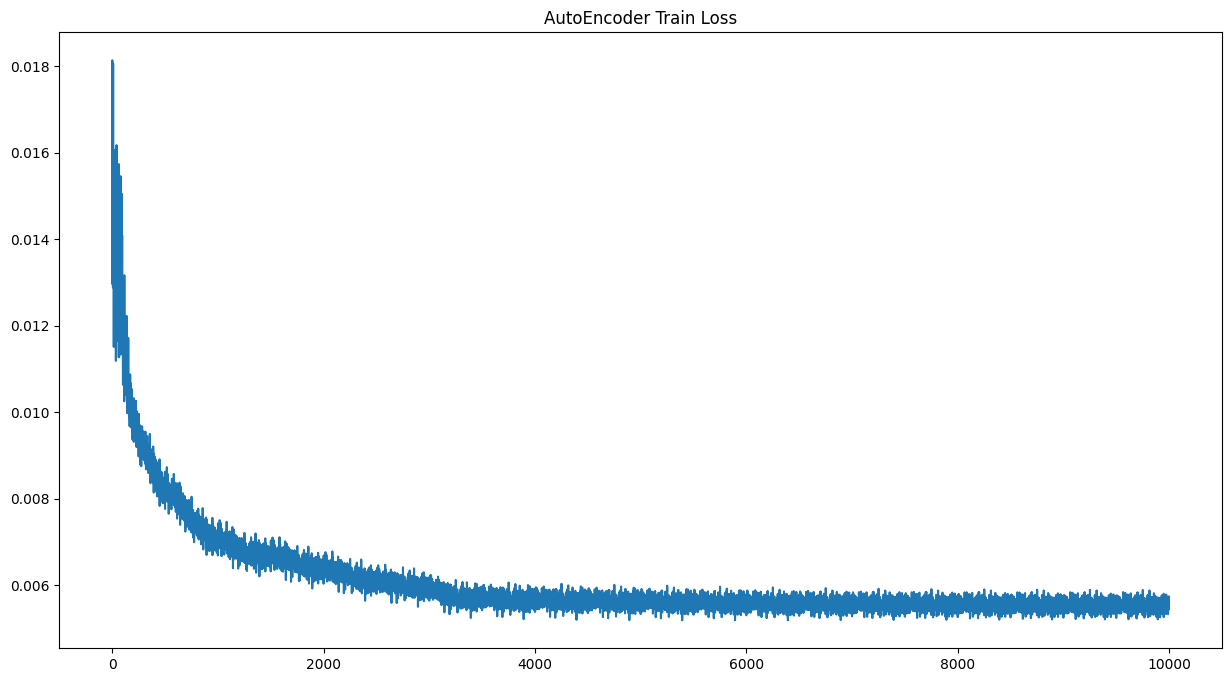

In [40]:
import seaborn as sns

plt.figure(figsize=(15, 8))
plt.title("AutoEncoder Train Loss")
sns.lineplot(losses)

Text(0.5, 1.0, 'reconstruction error Distribution')

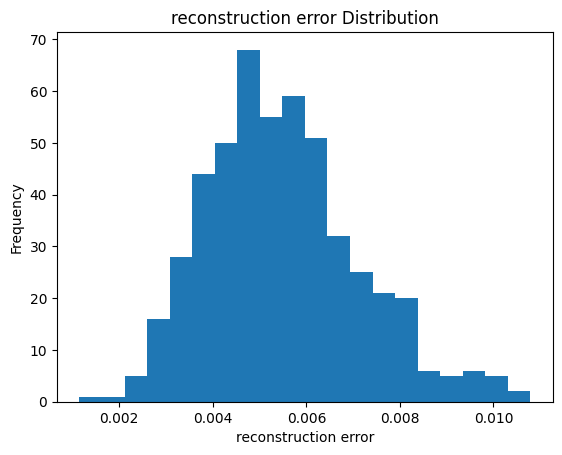

In [42]:
import matplotlib.pyplot as plt  

# reconstruction error 계산 
reconstruction_errors = torch.mean((outputs - inputs) ** 2, axis=1)  #MSE

# reconstruction error 히스토그램 시각화 
plt.hist(reconstruction_errors.detach().numpy(), bins=20) 
plt.xlabel('reconstruction error') 
plt.ylabel('Frequency') 
plt.title('reconstruction error Distribution')

In [43]:
outputs

tensor([[0.4357, 0.5237, 0.5197,  ..., 0.4632, 0.4629, 0.6064],
        [0.4766, 0.4702, 0.4809,  ..., 0.4740, 0.4460, 0.3248],
        [0.4931, 0.5134, 0.4930,  ..., 0.4415, 0.4662, 0.6219],
        ...,
        [0.6576, 0.4502, 0.4423,  ..., 0.4763, 0.4515, 0.5904],
        [0.5609, 0.4400, 0.4366,  ..., 0.4671, 0.3957, 0.5189],
        [0.5610, 0.4953, 0.4581,  ..., 0.4714, 0.4218, 0.3384]],
       grad_fn=<SigmoidBackward0>)

<Axes: >

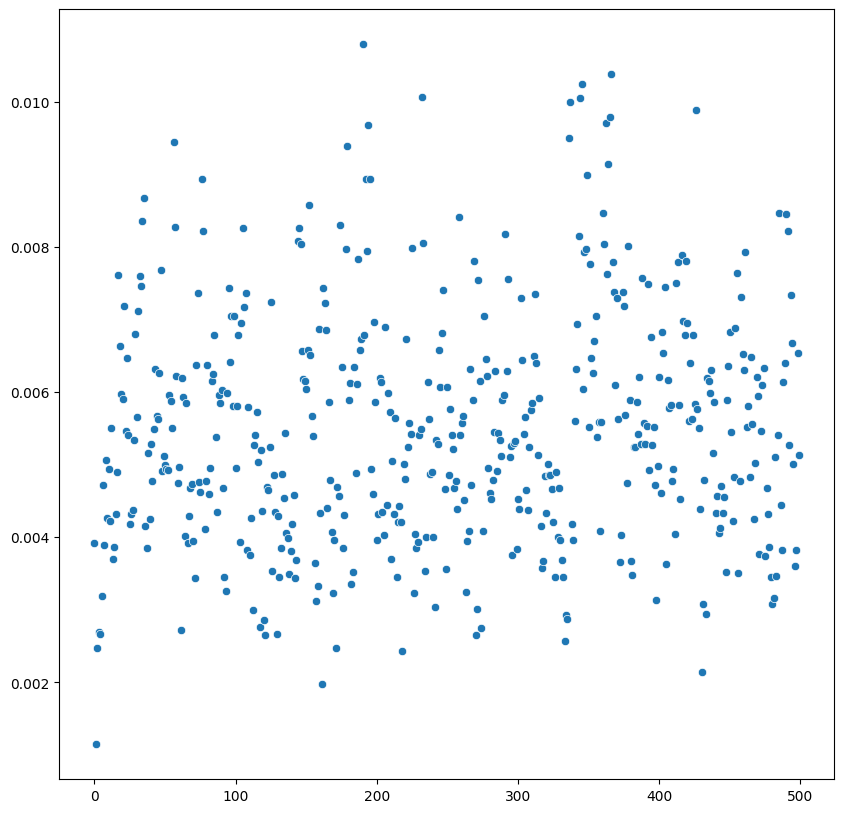

In [44]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.scatterplot(x=range(0, len(reconstruction_errors)), y=reconstruction_errors.detach().numpy())

In [45]:
def predict(model, dataset):
    with torch.no_grad():
        model.eval()
        outputs = model(dataset)
    
    reconstruction_errors = torch.mean((outputs - dataset)**2, axis=1)
    return reconstruction_errors

In [46]:
test_reconstruction_errors = predict(model=model, dataset=X_test_tensor)

In [47]:
train_reconstruction_errors = predict(model=model, dataset=X_train_tensor)

In [48]:
min(train_reconstruction_errors)

tensor(0.0003)

In [49]:
max(train_reconstruction_errors)

tensor(0.0173)

In [50]:
test_reconstruction_errors

tensor([2.0113e-03, 1.1680e-03, 5.1616e-03,  ..., 9.6164e+00, 9.6421e+00,
        9.6421e+00])

<Axes: >

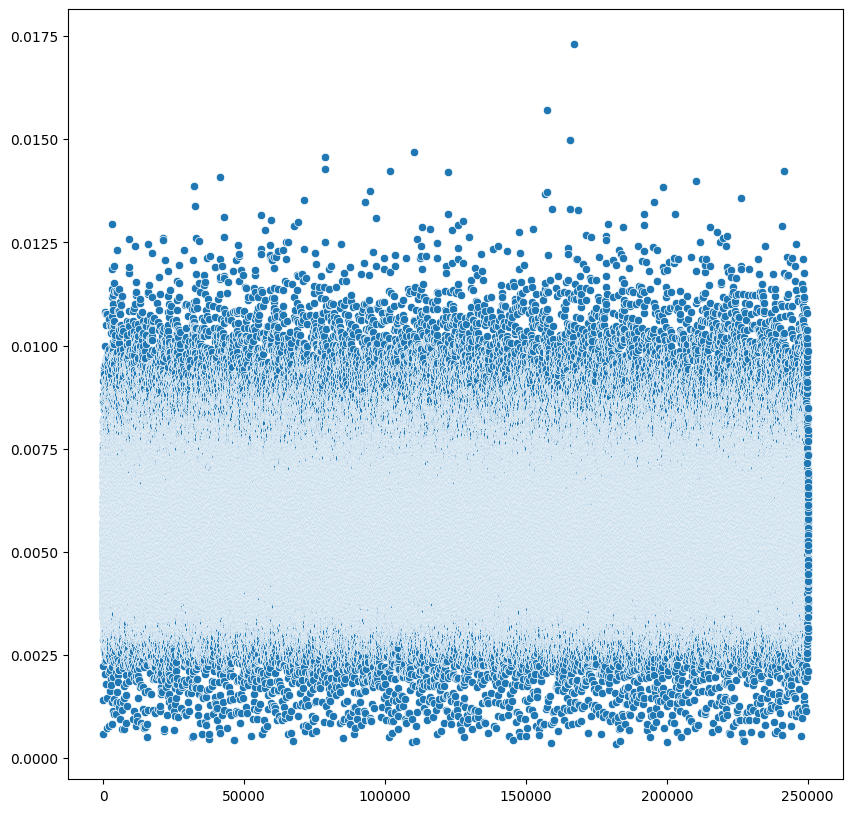

In [51]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=range(0, len(train_reconstruction_errors)), y=train_reconstruction_errors.detach().numpy())

<Axes: >

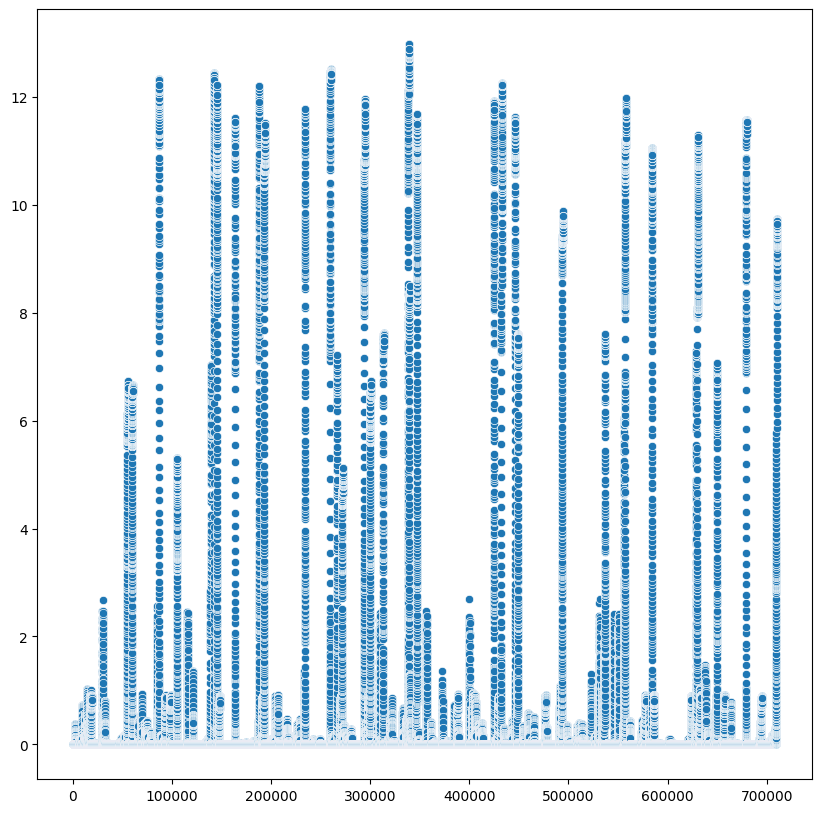

In [52]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=range(0, len(test_reconstruction_errors)), y=test_reconstruction_errors.detach().numpy())

In [53]:
len(np.where((min(train_reconstruction_errors.numpy()) > test_reconstruction_errors.numpy()) | (max(train_reconstruction_errors.numpy()) < test_reconstruction_errors.numpy()))[0])

111034

In [54]:
faultnum = np.where((min(train_reconstruction_errors.numpy()) > test_reconstruction_errors.numpy()) | (max(train_reconstruction_errors.numpy()) < test_reconstruction_errors.numpy()), 1, 0)

In [55]:
submission = pd.DataFrame(data = faultnum, columns=["faultNumber"])

In [26]:
submission.to_csv("submission_autoencoder.csv")

In [27]:
submission

,faultNumber
0,0
1,0
2,0
3,0
4,0
...,...
710395,1
710396,1
710397,1
710398,1


In [28]:
pd.concat([test_data, submission], axis=1)

,sample,simulationRun,xmeas_1,xmeas_10,xmeas_11,xmeas_12,xmeas_13,xmeas_14,xmeas_15,xmeas_16,...,xmv_11,xmv_2,xmv_3,xmv_4,xmv_5,xmv_6,xmv_7,xmv_8,xmv_9,faultNumber
0,1,151,0.24927,0.33775,80.122,50.119,2632.7,25.883,50.561,3101.9,...,16.011,53.877,24.767,62.495,22.050,39.9870,38.451,47.832,47.427,0
1,2,151,0.25248,0.33964,80.075,49.453,2632.4,25.949,51.504,3101.8,...,20.370,53.926,24.452,58.961,21.920,39.7560,36.490,50.014,47.059,0
2,3,151,0.25116,0.33801,80.147,48.533,2633.3,25.131,51.688,3102.2,...,16.036,54.323,24.588,60.385,22.270,39.9540,33.784,50.440,47.592,0
3,4,151,0.24815,0.33556,80.163,48.250,2632.3,23.923,49.509,3102.8,...,15.611,54.171,24.885,63.593,22.068,40.2530,32.951,45.397,47.591,0
4,5,151,0.23961,0.32149,80.138,48.410,2632.6,23.388,49.588,3102.2,...,16.618,53.690,23.879,61.476,21.861,38.2170,33.422,45.579,47.524,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710395,956,438,0.00000,0.20767,72.732,50.324,2920.8,25.377,49.508,3443.4,...,18.598,41.967,100.000,100.000,100.020,1.7372,39.055,45.394,100.410,1
710396,957,438,0.00000,0.20767,72.732,50.324,2920.8,25.377,49.508,3443.4,...,18.594,43.628,100.000,100.000,100.020,0.0000,39.055,45.394,100.410,1
710397,958,438,0.00000,0.20767,72.732,50.324,2920.8,25.377,49.508,3443.4,...,18.589,43.628,100.000,100.000,100.020,0.0000,39.055,45.394,100.410,1
710398,959,438,0.00000,0.20767,72.732,50.324,2920.8,25.377,49.508,3443.4,...,18.584,41.859,100.000,100.000,100.020,1.7723,39.055,45.394,100.410,1


In [29]:
desc_pred = pd.concat([test_data, submission], axis=1)[["simulationRun", "sample", "faultNumber"]]

In [30]:
desc_pred

,simulationRun,sample,faultNumber
0,151,1,0
1,151,2,0
2,151,3,0
3,151,4,0
4,151,5,0
...,...,...,...
710395,438,956,1
710396,438,957,1
710397,438,958,1
710398,438,959,1


In [49]:
desc_pred.query("faultNumber==1").groupby("simulationRun").count()

,sample,faultNumber
simulationRun,,
5,794,794
7,787,787
10,800,800
22,618,618
24,720,720
...,...,...
729,755,755
733,1,1
734,800,800


In [52]:
import plotly.graph_objects as go

fig = go.Figure()
plot_data = desc_pred.query("faultNumber==1").groupby("simulationRun").count()

fig.add_trace(go.Scatter(x=plot_data.index, y=plot_data["faultNumber"], mode='markers'))

fig.update_layout(width = 1400, height = 800, xaxis_title='simulationRun', yaxis_title='Number of anomaly')

<Axes: xlabel='simulationRun', ylabel='faultNumber'>

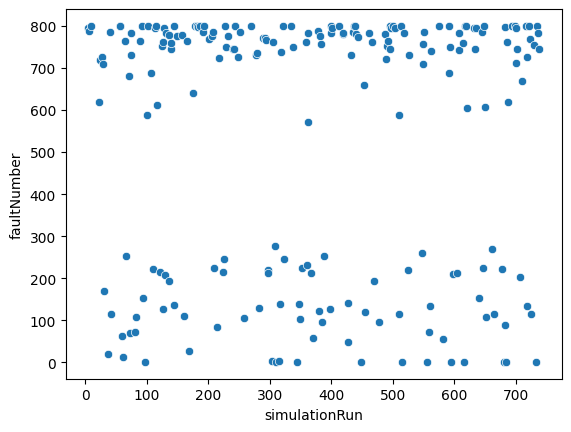

In [50]:
sns.scatterplot(x=desc_pred.query("faultNumber==1").groupby("simulationRun").count().index, y=desc_pred.query("faultNumber==1").groupby("simulationRun").count()["faultNumber"])